# Primeira Análise

### Importação das biblíotecas e bases

In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [73]:
novaMatrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Nova_Matrícula_Separada.csv')
rematrícula = pd.read_csv('/workspaces/Coleguium-Entrevista/Data/Tratados/Rematrícula_Separada.csv')
novaMatrícula['Bolsa'] = novaMatrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)
rematrícula['Bolsa'] = rematrícula['Bolsa (%)'].str.rstrip('%').str.replace(',', '.').astype(float)

In [74]:
nM = rematrícula
rM = novaMatrícula

Transformando as Datas em data type

In [75]:
nM['Data da matrícula'] = pd.to_datetime(nM['Data da matrícula'], format='mixed', dayfirst=True)
rM['Data da matrícula'] = pd.to_datetime(rM['Data da matrícula'], format='mixed', dayfirst=True)
rM

,Código Candidato,Data de nascimento,Série,Unidade,Data de Inscrição,Data da matrícula,Tipo,Bolsa (%),Real Anuidade,Diferença,Bolsa
0,CL0002,21/1/2021,Infantil 4,Conceição do Mato Dentro,2024-12-19,2024-12-20,Matrícula nova,"50,00%",15.176,1,50.0
1,CL0019,23/01/2022,Infantil 3,Castelo,2025-01-21,2025-01-27,Matrícula nova,"66,60%",6.672,6,66.6
2,CL0047,19/04/2015,5º ano,Conceição do Mato Dentro,2024-12-02,2024-12-02,Matrícula nova,"100,00%",11.471,0,100.0
3,CL0072,07/09/2022,Infantil 2,Castelo,2024-08-17,2024-12-09,Matrícula nova,"65,00%",8.515,114,65.0
4,CL0102,12/08/2022,Infantil 2,Castelo Manacás,2024-10-31,2025-01-21,Matrícula nova,"63,00%",7.453,82,63.0
...,...,...,...,...,...,...,...,...,...,...,...
1728,CL9940,08/02/2018,2º ano,Lagoa Santa,2025-01-15,2025-01-15,Matrícula nova,"55,00%",11.038,0,55.0
1729,CL9966,29/6/2015,4º ano,Alípio de Melo,2024-10-10,2024-11-19,Matrícula nova,"56,00%",11.106,40,56.0
1730,CL9979,9/7/2014,5º ano bilíngue,Lagoa Santa,2024-08-16,2024-12-20,Matrícula nova,"43,00%",14.421,126,43.0
1731,CL9987,11/04/2017,2º ano,Nova Suíça,2024-10-14,2024-10-24,Matrícula nova,"100,00%",0.000,10,100.0


Colocando as tabelas na ordem das datas

In [76]:
nM = nM.sort_values(by = ['Data da matrícula'])
rM = rM.sort_values(by = ['Data da matrícula'])
rM
nM.dtypes

Código Candidato              object
Data de nascimento            object
Série                         object
Unidade                       object
Data de Inscrição             object
Data da matrícula     datetime64[ns]
Tipo                          object
Bolsa (%)                     object
Real Anuidade                float64
Diferença                      int64
Bolsa                        float64
dtype: object

### Separando as bases em meses

In [77]:
AgostoNM   = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-08']
AgostoRM   = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-08']

SetembroNM = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-09']
SetembroRM = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-09']

OutubroNM  = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-10']
OutubroRM  = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-10']

NovembroNM = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-11']
NovembroRM = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-11']

DezembroNM = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-12']
DezembroRM = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2024-12']

JaneiroNM  = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2025-01']
JaneiroRM  = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2025-01']

FevereiroNM = nM[nM['Data da matrícula'].dt.strftime('%Y-%m') == '2025-02']
FevereiroRM = rM[rM['Data da matrícula'].dt.strftime('%Y-%m') == '2025-02']

Criando os data frames com as informações

In [78]:
dataNovaMatrícula = {
    'Meses' : ['Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro', 'Janeiro', 'Fevereiro'],
    'Media de Descontos' : [round(AgostoNM['Bolsa'].mean()), round(SetembroNM['Bolsa'].mean()), round(OutubroNM['Bolsa'].mean()), round(NovembroNM['Bolsa'].mean()), round(DezembroNM['Bolsa'].mean()), round(JaneiroNM['Bolsa'].mean()), round(FevereiroNM['Bolsa'].mean())],
    'Número de matrículas' : [AgostoNM['Bolsa'].count(), SetembroNM['Bolsa'].count(), OutubroNM['Bolsa'].count(), NovembroNM['Bolsa'].count(), DezembroNM['Bolsa'].count(), JaneiroNM['Bolsa'].count(), FevereiroNM['Bolsa'].count()]
}

In [ ]:
mesesNovaMatrícula = pd.DataFrame(dataNovaMatrícula)
mesesNovaMatrícula

In [81]:
dataRematrícula = {
    'Meses' : ['Agosto', 'Setembro', 'Outubro','Novembro', 'Dezembro', 'Janeiro', 'Fevereiro'],
    'Media de Descontos' : [round(AgostoRM['Bolsa'].mean()), round(SetembroRM['Bolsa'].mean()), round(OutubroRM['Bolsa'].mean()), round(NovembroRM['Bolsa'].mean()), round(DezembroRM['Bolsa'].mean()), round(JaneiroRM['Bolsa'].mean()), round(FevereiroRM['Bolsa'].mean())],
    'Número de matrículas' : [AgostoRM['Bolsa'].count(), SetembroRM['Bolsa'].count(), OutubroRM['Bolsa'].count(), NovembroRM['Bolsa'].count(), DezembroRM['Bolsa'].count(), JaneiroRM['Bolsa'].count(), FevereiroRM['Bolsa'].count()]
}

In [82]:
mesesRematrícula = pd.DataFrame(dataRematrícula)
mesesRematrícula

,Meses,Media de Descontos,Número de matrículas
0,Agosto,48,94
1,Setembro,51,196
2,Outubro,53,272
3,Novembro,57,357
4,Dezembro,62,285
5,Janeiro,63,466
6,Fevereiro,66,63


### Gráficos

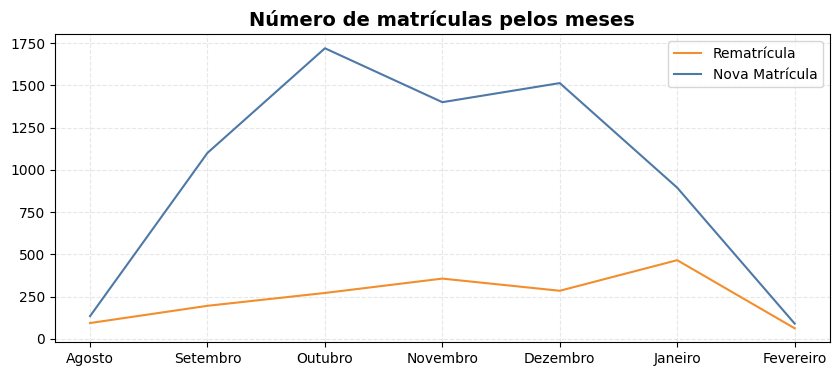

In [83]:
fig = plt.subplots(figsize=(10, 4))

plt.plot(mesesRematrícula['Meses'], mesesRematrícula['Número de matrículas'], color = '#F28E2B', label = 'Rematrícula')
plt.plot(mesesNovaMatrícula['Meses'], mesesNovaMatrícula['Número de matrículas'], color = '#4E79A7', label = 'Nova Matrícula')

plt.grid(axis=('both'), linestyle='--', alpha=0.3)
plt.title("Número de matrículas pelos meses", fontsize=14, weight='bold')
plt.legend()

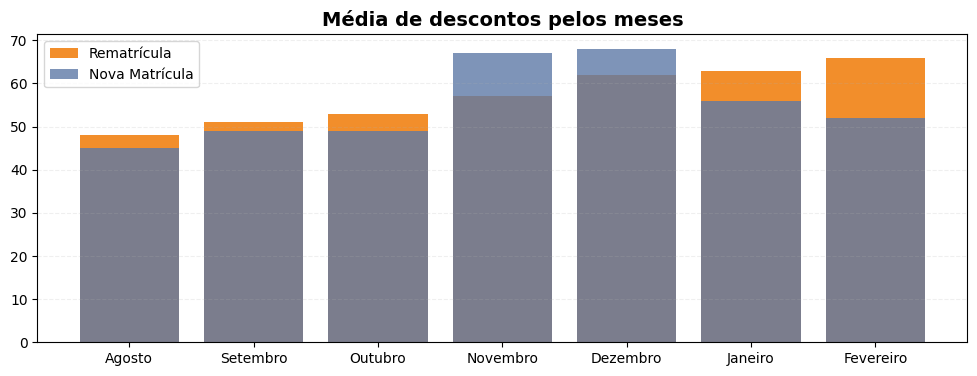

In [84]:
fig = plt.subplots(figsize=(12, 4))

plt.bar(mesesRematrícula['Meses'], mesesRematrícula['Media de Descontos'], color = '#F28E2B', label = 'Rematrícula')
plt.bar(mesesNovaMatrícula['Meses'], mesesNovaMatrícula['Media de Descontos'], color = '#5E79A7', label = 'Nova Matrícula', alpha = 0.8)


plt.grid(axis=('y'), linestyle='--', alpha=0.2)
plt.title("Média de descontos pelos meses", fontsize=14, weight='bold')
plt.legend()